In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\Nithishwar\OneDrive\Desktop\SKCET_EDA\archive (1)\Google_Stock_Test (2023).csv")
print(df.columns)

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use Close price for time series
price = df['Close']

print(price.head())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date
2023-01-03    89.120003
2023-01-04    88.080002
2023-01-05    86.199997
2023-01-06    87.339996
2023-01-09    88.019997
Name: Close, dtype: float64


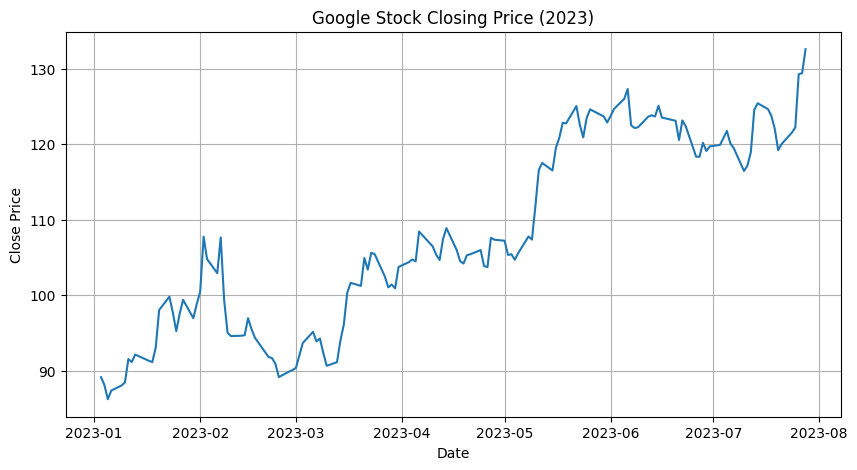

HI


In [3]:
#Time Series Visualization (Trend Analysis)
plt.figure(figsize=(10,5))
plt.plot(price)
plt.title("Google Stock Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()
print("HI")


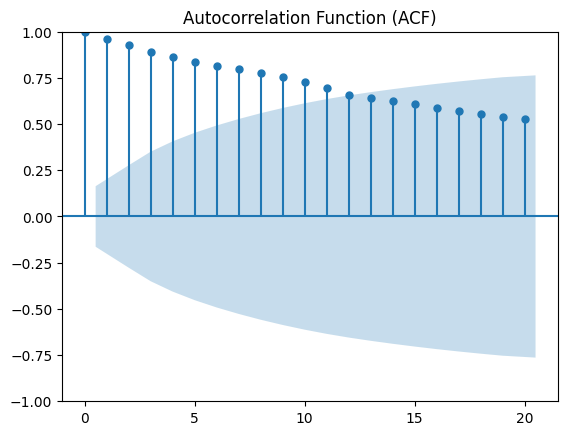

In [17]:
#ACF & PACF Visualization
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Autocorrelation Function (ACF) for MA
plot_acf(price, lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()


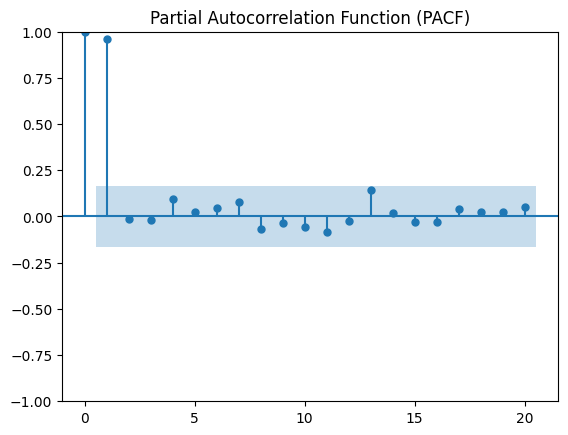

In [18]:
#Partial Autocorrelation Function (PACF) for AR
plot_pacf(price, lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()



In [20]:
#Train–Test Split
train_size = int(len(price) * 0.8)
train, test = price[:train_size], price[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

#Autoregressive (AR) Model
ar_model = AutoReg(train, lags=2)
ar_fit = ar_model.fit()

print(ar_fit.summary())


Train size: 114
Test size: 29
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  114
Model:                     AutoReg(2)   Log Likelihood                -246.643
Method:               Conditional MLE   S.D. of innovations              2.189
Date:                Sun, 08 Feb 2026   AIC                            501.286
Time:                        13:20:30   BIC                            512.160
Sample:                             2   HQIC                           505.698
                                  114                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8075      1.932      0.936      0.349      -1.979       5.594
Close.L1       1.0401      0.094     11.029      0.000       0.855       1.225
Close.L2      -0.0544 

C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


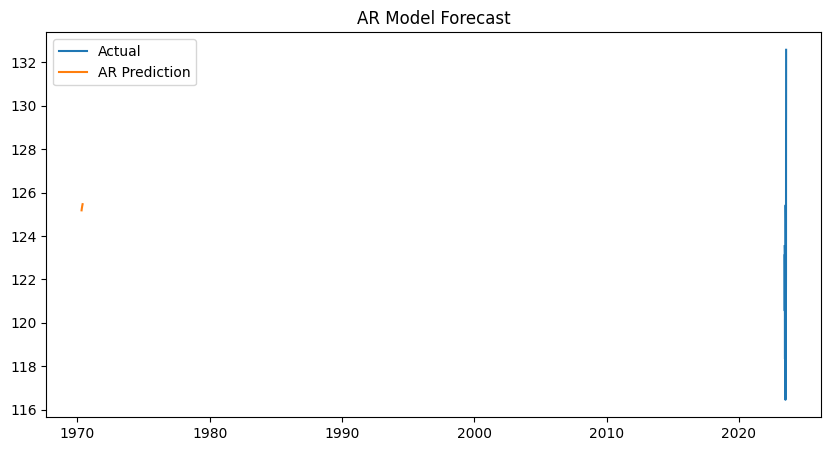

In [22]:
#AR Forecast
ar_pred = ar_fit.predict(start=len(train), end=len(price)-1)

plt.figure(figsize=(10,5))
plt.plot(test, label="Actual")
plt.plot(ar_pred, label="AR Prediction")
plt.legend()
plt.title("AR Model Forecast")
plt.show()


C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  114
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -336.147
Date:                Sun, 08 Feb 2026   AIC                            680.293
Time:                        13:22:29   BIC                            691.238
Sample:                             0   HQIC                           684.735
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.2331      1.330     78.389      0.000     101.627     106.839
ma.L1          1.3693      0.072     19.001      0.000       1.228       1.511
ma.L2          0.6868      0.075      9.207      0.0

C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


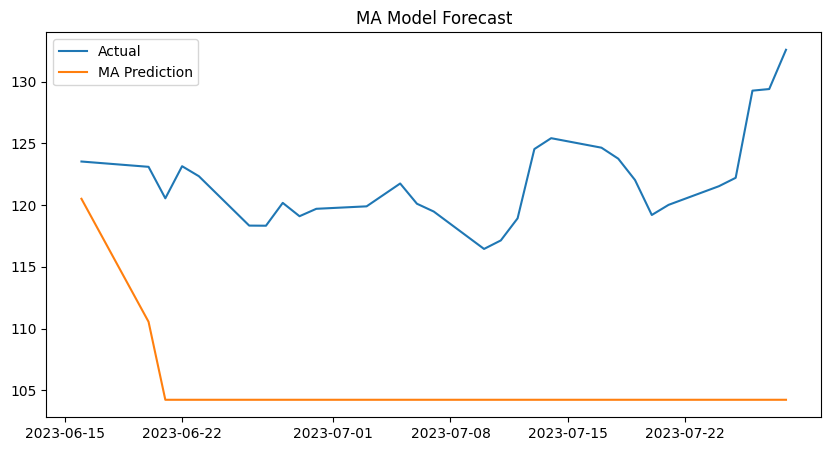

In [24]:
#Moving Average (MA) Model
ma_model = ARIMA(train, order=(0,0,2))
ma_fit = ma_model.fit()

print(ma_fit.summary())
#MA Forecast
ma_pred = ma_fit.forecast(steps=len(test))

plt.figure(figsize=(10,5))
plt.plot(test, label="Actual")
plt.plot(test.index, ma_pred, label="MA Prediction")
plt.legend()
plt.title("MA Model Forecast")
plt.show()


In [26]:
#ARMA Model
arma_model = ARIMA(train, order=(2,0,2))
arma_fit = arma_model.fit()

print(arma_fit.summary())
#Model Comparison (AIC & BIC)
print("AR  AIC:", ar_fit.aic)
print("MA  AIC:", ma_fit.aic)
print("ARMA AIC:", arma_fit.aic)

print("AR  BIC:", ar_fit.bic)
print("MA  BIC:", ma_fit.bic)
print("ARMA BIC:", arma_fit.bic)


C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nithishwar\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  114
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -252.909
Date:                Sun, 08 Feb 2026   AIC                            517.817
Time:                        13:23:40   BIC                            534.235
Sample:                             0   HQIC                           524.480
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8820     11.284      9.383      0.000      83.766     127.998
ar.L1          0.3534      0.508      0.696      0.487      -0.642       1.349
ar.L2          0.6268      0.494      1.269      0.2

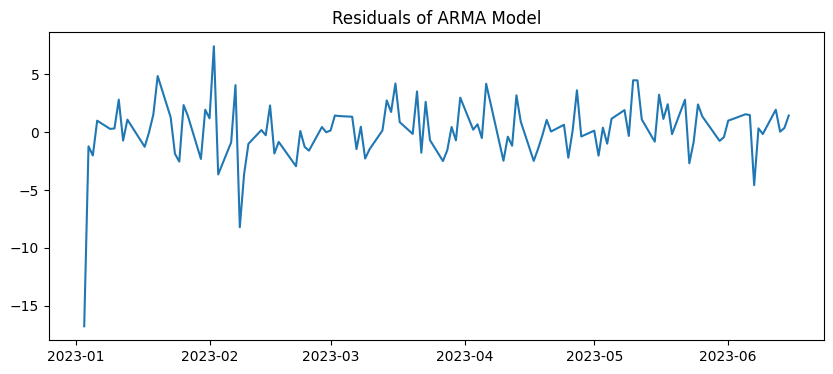

In [29]:
#Residual Diagnostics
residuals = arma_fit.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals of ARMA Model")
plt.show()
#Ljung–Box Test (Autocorrelation Check)
